Алиева Хадижат ПИ20-1. Лабораторная работа 0.3. Простой анализ данных

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from numpy.random import randn
import seaborn as sns

1. Загрузите данные в ноутбук

In [ ]:
df = pd.read_excel('Вариант 3.xlsx', header=2)[:-1]
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,152.0,11,М,333.0,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3.0,10.0,36.0
1,2.0,140.0,12,Ж,332.0,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4.0,14.0,36.0
2,3.0,137.0,11,М,328.0,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
3,4.0,148.0,11,М,333.0,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
4,5.0,153.0,11,Ж,333.0,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...
1175,1176.0,148.0,11,М,332.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51.0,98.0,36.0
1176,1177.0,148.0,11,М,330.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51.0,98.0,36.0
1177,1178.0,152.0,11,Ж,330.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)2(3)3(3),NaN,51.0,98.0,36.0
1178,1179.0,147.0,11,М,332.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)3(3),NaN,52.0,100.0,36.0


2. Сделайте описательную статистику по набранному баллу


In [ ]:
df['Балл'].describe()

#df['Первичный балл'].describe()

count    1180.000000
mean       52.047458
std        14.965477
min        10.000000
25%        41.000000
50%        49.000000
75%        60.250000
max       100.000000
Name: Балл, dtype: float64

3. Найдите процент учащихся, выполнивших работу ниже среднего


In [ ]:
print(df[df['Балл']<df['Балл'].mean()].shape[0]*100/df.shape[0])

56.271186440677965


4. Найти процент учащихся не сдавших экзамен


In [ ]:
print(df[df['Балл']<df['Минимальный балл']].shape[0]*100/df.shape[0])

7.711864406779661


5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен


(-1.10767547871942,
 1.1003655029520785,
 -1.1004919514443379,
 1.1076814038457912)

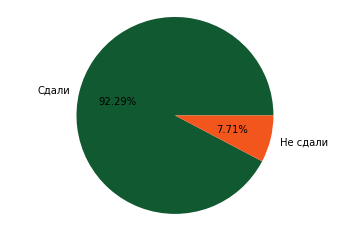

In [ ]:
pss = df[df['Балл']>=df['Минимальный балл']].shape[0]
ntpss = df[df['Балл']<df['Минимальный балл']].shape[0]

vals =[pss, ntpss]
labels=["Сдали","Не сдали"]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, colors=['#115930', '#F2561D'], autopct='%.2f%%')

ax.axis("equal")

6. Постройте ядерную оценку плотности распределению баллов за экзамен


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


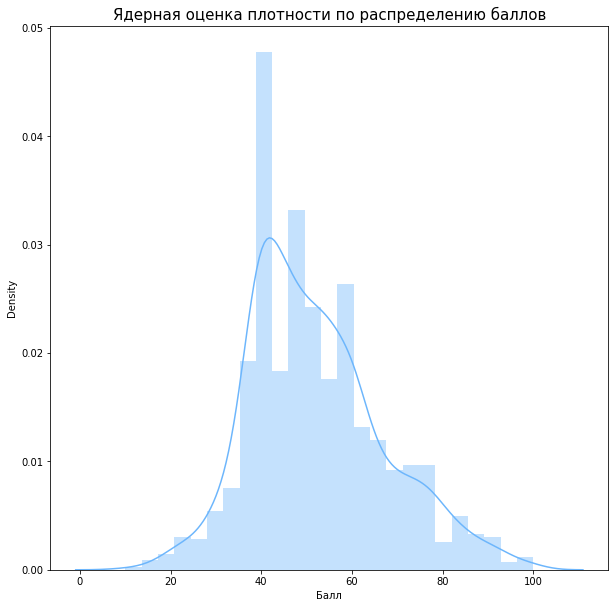

In [ ]:
sns.set_palette("hls")

plt.rc("figure", figsize=(10, 10))

plt.title("Ядерная оценка плотности по распределению баллов", fontsize=15)

sns.distplot(df['Балл'], color="#6DB6FC")

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».


(-1.1172653102972046,
 1.1008221576332002,
 -1.1098966221429787,
 1.115593690091159)

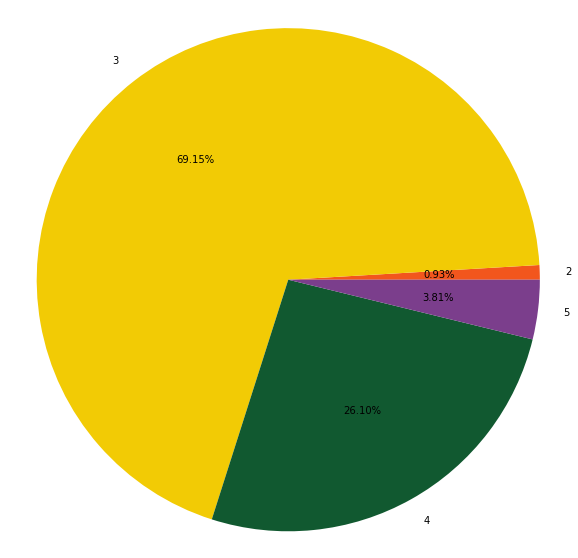

In [ ]:
#от 22 до 58 баллов — оценка «три», от 59 до 83 — оценка «четыре», от 84 до 100 — оценка «пять».

dva = df[df['Балл']<22].shape[0]
tri = df[(df['Балл']>=22)&(df['Балл']<=58)].shape[0]
chet = df[(df['Балл']>=59)&(df['Балл']<=83)].shape[0]
pyat = df[(df['Балл']>=84)&(df['Балл']<=100)].shape[0]

vals =[dva, tri, chet, pyat]
labels=['2', '3', '4', '5']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, colors=['#F2561D', '#F2CB05', '#115930', '#7B3E8C'], autopct='%.2f%%')

ax.axis("equal")

#print(dva*100/df.shape[0])
#print(tri*100/df.shape[0])
#print(chet*100/df.shape[0])#F2CB05
#print(pyat*100/df.shape[0])


8. Какое процентное соотношение юношей и девушек писало данный экзамен?


(-1.1131080390600707,
 1.1006242278019693,
 -1.1082525532508845,
 1.111932466516017)

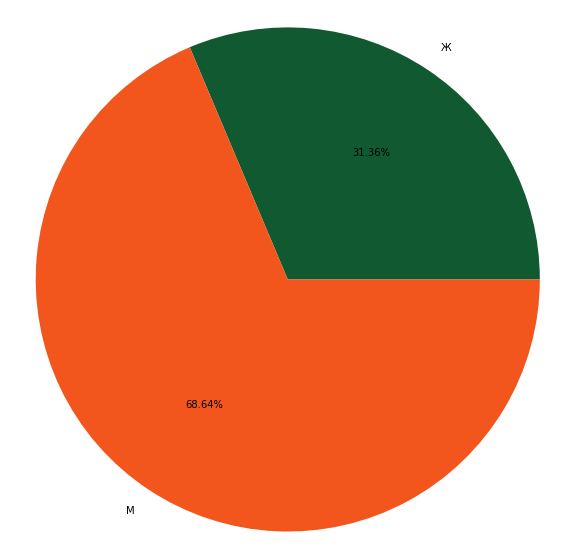

In [ ]:
w = df[df['Пол'] == 'Ж'].shape[0]
m = df[df['Пол'] == 'М'].shape[0]

vals =[w, m]
labels=['Ж', 'М']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, colors=['#115930', '#F2561D'], autopct='%.2f%%')

ax.axis("equal")


#print(w*100/df.shape[0])
#print(m*100/df.shape[0])



9. Сколько школ принимало участие в экзамене?

In [ ]:
df['№ школы'].nunique()

19